In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
data = pd.read_csv("train.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#check for null data
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin and Embarked has null values.

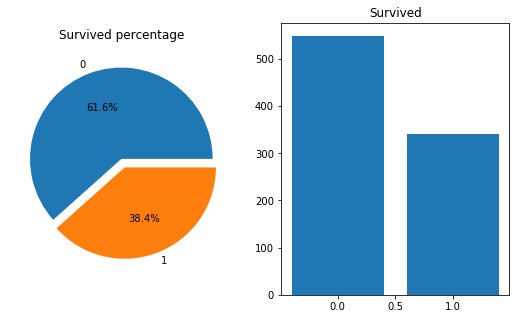

In [6]:
f, ax = plt.subplots(1, 2, figsize=(9, 5))

ax[0].pie(data["Survived"].value_counts().values, explode=[0, 0.1],
       autopct="%1.1f%%", labels=data["Survived"].value_counts().index)
ax[0].set_title("Survived percentage")


ax[1].bar(data["Survived"].value_counts().index,data["Survived"].value_counts().values)
ax[1].set_title("Survived")

plt.show()

In [7]:
data["Survived"].value_counts().values

array([549, 342], dtype=int64)

In [8]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
data.groupby(["Sex", "Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

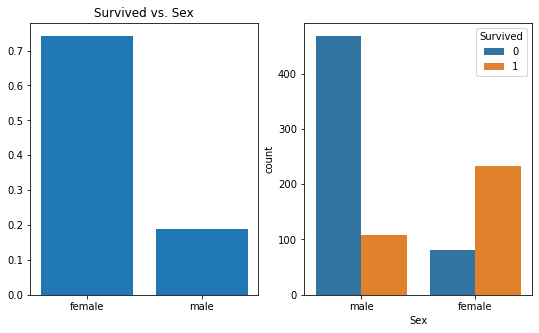

In [10]:
f, ax = plt.subplots(1, 2, figsize=(9, 5))

ax[0].bar(data[["Sex", "Survived"]].groupby(["Sex"]).mean().index,
         data[["Sex", "Survived"]].groupby(["Sex"]).mean().values.squeeze())
ax[0].set_title("Survived vs. Sex")

sns.countplot("Sex", hue="Survived" ,data=data, ax=ax[1])

plt.show()

In [11]:
data["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [12]:
data[["Pclass", "Survived"]].groupby(["Pclass"]).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


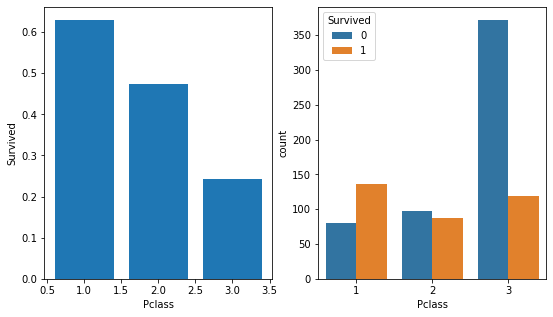

In [13]:
f, ax = plt.subplots(1, 2, figsize=(9, 5))

ax[0].bar(data[["Pclass", "Survived"]].groupby(["Pclass"]).mean().index,
      data[["Pclass", "Survived"]].groupby(["Pclass"]).mean().values.squeeze())
ax[0].set_xlabel("Pclass")
ax[0].set_ylabel("Survived")

sns.countplot("Pclass", hue="Survived", data=data, ax=ax[1])

plt.show()

There were more people in class 3 but we can see that survival ratio of class 1 is high!

Lets explore Age

In [14]:
print("Minimum age is ",data["Age"].min(), "years")
print("Maximum age is ",data["Age"].max(), "years")
print("Average age is ",data["Age"].mean(), "years")

Minimum age is  0.42 years
Maximum age is  80.0 years
Average age is  29.69911764705882 years


In [15]:
print(data["Age"].isna().mean()*100, "% values null")

19.865319865319865 % values null


Are threre other features which can be related to the age?
Maybe name can help

In [16]:
data["Name"];
#Maybe we can use Salutations for a relation between age format is 
#Surname, Salutaion. name name2

In [17]:
data["Initial"]=""
data["Initial"]=data.Name.str.extract("([A-Za-z]+)\.")

In [18]:
data["Initial"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [19]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                         'Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other',
                         'Other','Other','Mr','Mr','Mr'],inplace=True)

In [20]:
sal_age_map = data.groupby(["Initial"])["Age"].mean()

So, now we can fill missing ages with the above values

In [21]:
age_null_idx = data["Age"].isnull()
for i in sal_age_map.index:
    data.loc[(age_null_idx) & (data["Initial"]==i), "Age"]=int(sal_age_map[i])

In [22]:
data.Age.isna().sum()
#Ages seems to be good from now!

0

In [23]:
data.groupby(["Age"])["Survived"].sum().index

Float64Index([0.42, 0.67, 0.75, 0.83, 0.92,  1.0,  2.0,  3.0,  4.0,  5.0,  6.0,
               7.0,  8.0,  9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 14.5, 15.0, 16.0,
              17.0, 18.0, 19.0, 20.0, 20.5, 21.0, 22.0, 23.0, 23.5, 24.0, 24.5,
              25.0, 26.0, 27.0, 28.0, 28.5, 29.0, 30.0, 30.5, 31.0, 32.0, 32.5,
              33.0, 34.0, 34.5, 35.0, 36.0, 36.5, 37.0, 38.0, 39.0, 40.0, 40.5,
              41.0, 42.0, 43.0, 44.0, 45.0, 45.5, 46.0, 47.0, 48.0, 49.0, 50.0,
              51.0, 52.0, 53.0, 54.0, 55.0, 55.5, 56.0, 57.0, 58.0, 59.0, 60.0,
              61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 70.0, 70.5, 71.0, 74.0,
              80.0],
             dtype='float64', name='Age')

<BarContainer object of 88 artists>

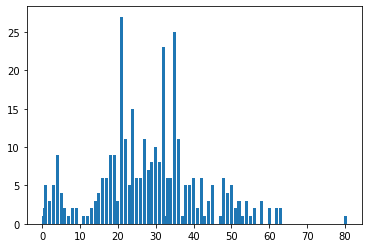

In [24]:
plt.bar(data.groupby(["Age"])["Survived"].sum().index,
       data.groupby(["Age"])["Survived"].sum().values)

In [25]:
data['AgeGroup']=0
data.loc[data['Age']<=16,'AgeGroup']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'AgeGroup']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'AgeGroup']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'AgeGroup']=3
data.loc[data['Age']>64,'AgeGroup']=4
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [26]:
data.groupby(["AgeGroup", "Sex","Survived"])["Survived"].sum()

AgeGroup  Sex     Survived
0         female  0             0
                  1            33
          male    0             0
                  1            24
1         female  0             0
                  1           110
          male    0             0
                  1            54
2         female  0             0
                  1            68
          male    0             0
                  1            22
3         female  0             0
                  1            22
          male    0             0
                  1             8
4         male    0             0
                  1             1
Name: Survived, dtype: int64

There are features **Parch**, and **SibSp** (Parent Child, Sibling Spouse respectively). We can infer FamilySize from that as it would surely contribute to the survival chances

We can use **Alone** as a separate feature.

In [27]:
data["FamilySize"] = 0
data["FamilySize"] = data["Parch"] + data["SibSp"]

data["Alone"]=0
data.loc[data["FamilySize"]==0, "Alone"]=1

In [28]:
data[["FamilySize", "Survived"]].groupby(["FamilySize"]).mean()

,Survived
FamilySize,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


<BarContainer object of 9 artists>

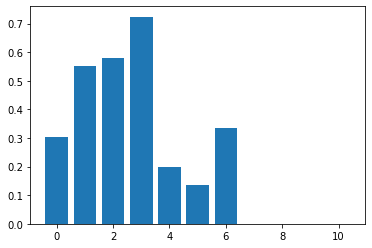

In [29]:
plt.bar(data[["FamilySize", "Survived"]].groupby(["FamilySize"]).mean().index,
       data[["FamilySize", "Survived"]].groupby(["FamilySize"]).mean().values.squeeze())

We can see that more then 70% of passangers having family size 3 survived

There should also be a relation between Fare and survival chances. As there are in Pclass and Survival. Let's find out

In [30]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
AgeGroup         0
FamilySize       0
Alone            0
dtype: int64

In [31]:
data.Fare.max()//5

102.0

In [32]:
#This is a function I learned which is really helpful
data["FareRange"] = pd.qcut(data["Fare"], 4)

In [33]:
data.groupby(["FareRange"])["Survived"].mean().to_frame()

,Survived
FareRange,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


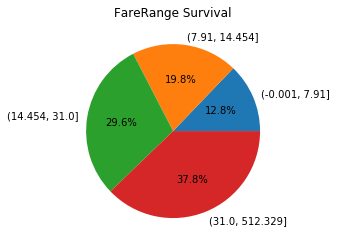

In [34]:
plt.pie(data.groupby(["FareRange"])["Survived"].mean().values.squeeze(),
       labels=data.groupby(["FareRange"])["Survived"].mean().index, 
       autopct="%1.1f%%" 
       )
plt.title("FareRange Survival")
plt.show()

In [35]:
data['FareGroup']=0
data.loc[data['Fare']<=7.91,'FareGroup']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'FareGroup']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'FareGroup']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'FareGroup']=3

I think We can now move to converting String to numerical values

In [36]:
data["Sex"].replace(["male", "female"], [0, 1], inplace=True)
data['Embarked'].replace(["S", "C", "Q"], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

**Name**: No need

**Age**: AgeGroup

**Ticket**: No need (Random)

**Fare**: FareGroup

**Cabin**: No need

**PassengerId**: Can't categorize

In [37]:
data.drop(['Name','Age','Ticket','Fare','Cabin','FareRange','PassengerId'],axis=1,inplace=True)

In [38]:
data

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,AgeGroup,FamilySize,Alone,FareGroup
0,0,3,0,1,0,0.0,0,1,1,0,0
1,1,1,1,1,0,1.0,1,2,1,0,3
2,1,3,1,0,0,0.0,2,1,0,1,1
3,1,1,1,1,0,0.0,1,2,1,0,3
4,0,3,0,0,0,0.0,0,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,0.0,4,1,0,1,1
887,1,1,1,0,0,0.0,2,1,0,1,2
888,0,3,1,1,2,0.0,2,1,3,0,2
889,1,1,0,0,0,1.0,0,1,0,1,2


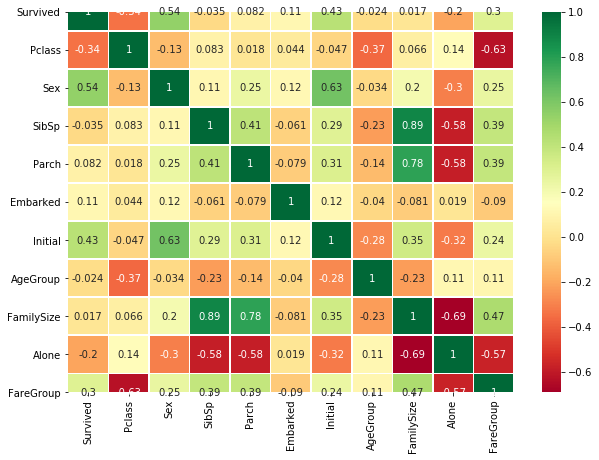

In [55]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.5,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()